# Tutoraggio 3

In [1]:
addpath("./functions");

## Esercizio 1

Sia assegnata la funzione $f(x) = \sin(x) - \sqrt{x}$ nell'intervallo $[0, \frac{\pi}{2}]$.

### Punto a

Si determina il polinomio di interpolazione della funzione $f$, che si ottiene dalla formula di Lagrange relativa ai nodi $x_0 = 0$, $x_1 = h$, $x_2 = 2h$, $x_3 = 3h$, $x_4 = \frac{\pi}{2}$, con $h = \frac{\pi}{8}$.

Per una retta sono necessari due nodi, tre per una parabola, quattro per una cubica, cinque per una quadrica.

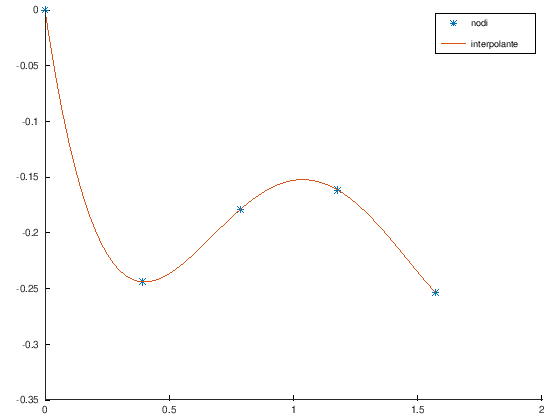

In [2]:
f = @(x) sin(x) - x.^(1/2);

h = pi/8;
x = [0, h, 2*h, 3*h, pi/2];
y = f(x);

% si cerca un polinomio di quarto grado (num punti -1) tale che:
% p_4 (x(k)) = y(k), in altri termini si vuole l'uguaglianza punto per punto
% dei punti dati
% p = L_1 + L_2 + L_3 + L_4 + L_5
% dove per il k-esimo polinomio L_k vale:
% L_k(x(j)) = y(k) * delta(j,k)
% delta vale 1 se j = k, 0 altrimenti

figure
t = linspace(0, pi/2);
y_lag = interp_lagrange(x, y, t);
plot( x, y, "*", ...
      t, y_lag);
box off
legend("nodi", "interpolante");

### Punto b

b) si costruisce (sia mediante il metodo delle equazioni normali che mediante il metodo QRLS) il polinomio di terzo grado che approssima ai minimi quadrati il set di dati ottenuto campionando la funzione $f$ nei punti `0:pi/24:pi/2`.

In [8]:
x = (0: pi/24 : pi/2);
y = f(x);

% si cerca p_3 tale che p sia:
% p_3(t) = a*t^3 + b*t^2 + c*t + d
% p_3(x) ~~ y <==> [x.^3, x.^2, x, 1] * [a, b, c, d]' ~~ y
% in modo che ||Y - y||_2 sia minima

p_enls = NEmethod(x', y', 3);
p_qrls = QRmethod(x', y', 3);

### Punto c

c) si confrontano i grafici dei polinomi ottenuti ai punti a) e b) con quello di $f$.

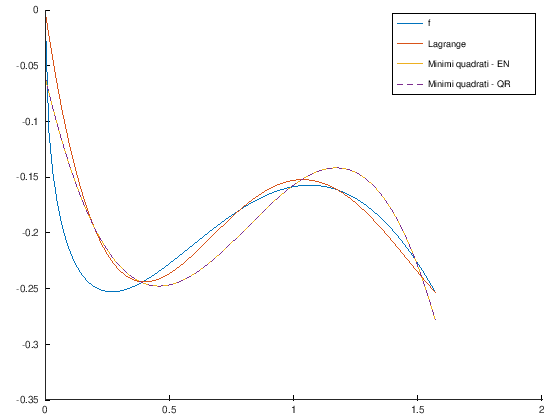

In [11]:
x = linspace(0, pi/2);
y = f(x);

y_enls = polyval(p_enls, x);
y_qrls = polyval(p_qrls, x);

figure
plot( t, f(t), ...
      t, y_lag, ...
      t, y_enls, ...
      t, y_qrls, "--")
box off
legend("f", "Lagrange", "Minimi quadrati - EN", "Minimi quadrati - QR");

La funzione $f$ per la sua struttura (regolare e con unico flesso, ovvero un unico cambio di concavità, il punto di flesso corrisponde allo zero della derivata seconda) si presta ad un buon grado di approssimazione anche con un polinomio di terzo grado. Il risultato che si ottiene è un sistema sovradeterminato stabile, che dà lo stesso risultato sia con EN che QR. Se il sistema non fosse stato particolarmente stabile probabilmente il metodo delle equazioni normali non sarebbe riuscito ad ottenere un'approssimazione abbastanza accurata.

In [13]:
err_inf_lag = max(abs(y - y_lag))
err_inf_enls = max(abs(y - y_enls))
err_inf_qrls = max(abs( y - y_qrls))

err_inf_lag =  0.10564
err_inf_enls =  0.076735
err_inf_qrls =  0.076735


Si nota che l'errore assoluto in norma infinito commesso è addirittura minore nel caso dei minimi quadrati.

## Esercizio 2

Si considerino i punti del piano di coordinate:

$$
\begin{array}{|c|c|c|c|c|c|}
\hline & i=1 & i=2 & i=3 & i=4 & i=5 \\
\hline x_{i} & 0.0004 & 0.2507 & 0.5008 & 2.0007 & 8.0013 \\
\hline y_{i} & 0.0007 & 0.0162 & 0.0288 & 0.0309 & 0.0310 \\
\hline
\end{array}
$$

### Punto a

Determinare i polinomi di approssimazione ai minimi quadrati di grado 1 e 2 rappresentarli in un grafico insieme ai dati $(x_i, y_i), i = 1, \dotsc, 5$

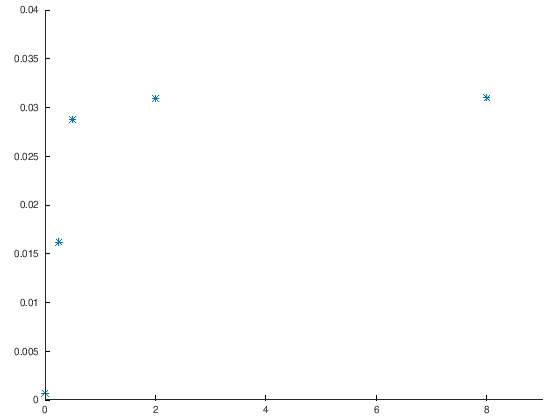

In [41]:
x = [0.0004 0.2507 0.5008 2.0007 8.0013]';
y = [0.0007 0.0162 0.0288 0.0309 0.0310]';

% grafico dei punti forniti
figure
plot(x,y,"*");
xlim([0 9])
box off

Né un polinomio di grado 1 né uno di grado 2 hanno grandi possibilità di approssimare il polinomio dato in modo accurato. Le basi esponenziali potenzialmente possono fornire la migliore approssimazione.

In [48]:
% lineare -- grado 1 -- a*x + b
V = [x, ones(5,1)];
f_1 = (V' * V) \ (V' * y);

% quadratica -- grado 2 -- a*x^2 + b*x + c
V = [x.^2, x, ones(5,1)];
%Va = vander(x) % solo le ultime tre colonne
%V = Va(:,5)
f_2 = (V' * V) \ (V' * y);

### Punto b

Determinare, nel senso dei minimi quadrati, i coefficienti a, b, c della seguente
approssimazione con basi esponenziali:

$$y = a + be^{-x} + ce^{-2x} $$

Rappresentare l’approssimante ottenuto in un grafico, insieme ai dati $(x_i, y_i), i = 1, \dotsc, 5$

In [56]:
% i coefficienti vanno in ordine crescente in f_3 in base all'ordine
% stabilito nella matrice di Vandermonde V
V = [exp(-2*x), exp(-x), ones(5,1)];
a = (V' * V) \ (V' * y);
f_3 = @(x) a(1)*exp(-2*x) + a(2)*exp(-x) + a(3);

### Punto c

Quale tra le tre approssimazioni ottenute ai punti precedenti risulta migliore?
Confrontare gli errori

$$
E_{j}=\sum_{i=1}^{5}\left(f_{j}\left(x_{i}\right)-y_{i}\right)^{2}, \quad j=1,2,3
$$

dove $f_1$ e $f_2$ denotano i polinomi di approssimazione di grado 1 e 2 determinati al punto a), mentre $f_3$ denota l’approssimazione con basi esponenziali determinata al punto b).

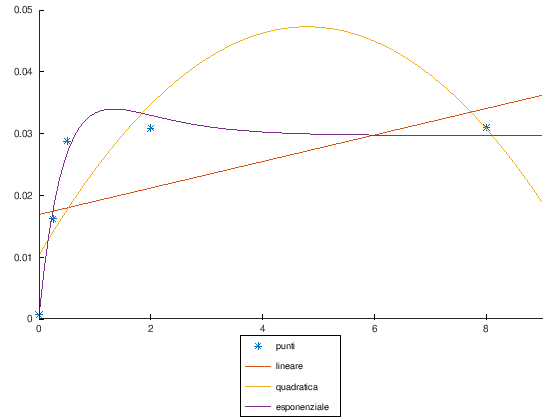

In [59]:
t = linspace(0, 9);
figure
plot( x, y, "*", ...
      t, polyval(f_1, t), ...
      t, polyval(f_2, t), ...
      t, f_3(t));
legend("punti", "lineare", "quadratica", "esponenziale", ...
    "location", "southoutside");
xlim([0 9])
box off

Per fornire una valutazione più formale dei risultati ottenuti si calcolano le norme al quadrato

In [61]:
format long
E_1 = norm(polyval(f_1, x) - y, 2)^2
E_2 = norm(polyval(f_2, x) - y, 2)^2
E_3 = norm(f_3(x) - y, 2)^2

E_1 =    4.848327762313228e-04
E_2 =    2.364635594024985e-04
E_3 =    1.224973312890181e-05


L'errore che si commette con l'esponenziale è 20 volte inferiore a quello commesso con la parabola. L'errore commesso con la parabola è pari alla metà di quello commesso con la retta. Anche dal punto di vista qualitativo, osservando il grafico, si nota che la migliore approssimazione si ha proprio con l'esponenziale.